In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Bayes' Theorem for medical diagnosis

# Given probabilities
P_disease = 0.01  # Prior probability of having the disease
P_positive_given_disease = 0.95  # Sensitivity of the test
P_negative_given_no_disease = 0.90  # Specificity of the test

# Calculate P(positive)
P_positive = P_disease * P_positive_given_disease + (1 - P_disease) * (1 - P_negative_given_no_disease)

# Apply Bayes' Theorem
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

print(f"Probability of having the disease given a positive test result: {P_disease_given_positive:.4f}")

Probability of having the disease given a positive test result: 0.0876


In [4]:
# Generate synthetic data
n_samples = 10000
has_disease = np.random.choice([True, False], size=n_samples, p=[P_disease, 1-P_disease])
test_results = np.random.random(n_samples) < np.where(has_disease, 
                                                      P_positive_given_disease, 
                                                      1 - P_negative_given_no_disease)

df = pd.DataFrame({'Has Disease': has_disease, 'Test Positive': test_results})

<Figure size 1000x600 with 0 Axes>

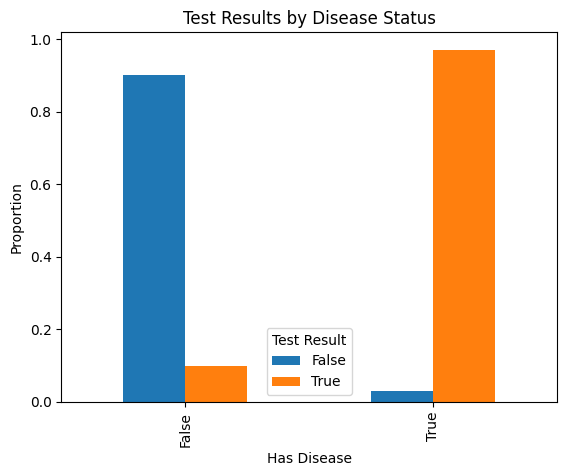

In [5]:
# Visualize results
plt.figure(figsize=(10, 6))
df.groupby('Has Disease')['Test Positive'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.title("Test Results by Disease Status")
plt.xlabel("Has Disease")
plt.ylabel("Proportion")
plt.legend(title="Test Result")
plt.show()

In [7]:
# Eigenvalues and Eigenvectors

# Create a sample 3x3 matrix
A = np.array([[4, -2, 1],
              [-2, 3, -1],
              [1, -1, 2]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Matrix A:
[[ 4 -2  1]
 [-2  3 -1]
 [ 1 -1  2]]

Eigenvalues:
[6.04891734 1.64310413 1.30797853]

Eigenvectors:
[[ 0.73697623 -0.59100905  0.32798528]
 [-0.59100905 -0.32798528  0.73697623]
 [ 0.32798528  0.73697623  0.59100905]]



Verification for eigenpair 1:
A * v1 =
[ 4.45790829 -3.57496488  1.98395583]
λ1 * v1 =
[ 4.45790829 -3.57496488  1.98395583]

Verification for eigenpair 2:
A * v2 =
[-0.97108941 -0.53891396  1.21092869]
λ2 * v2 =
[-0.97108941 -0.53891396  1.21092869]

Verification for eigenpair 3:
A * v3 =
[0.4289977  0.96394908 0.77302715]
λ3 * v3 =
[0.4289977  0.96394908 0.77302715]


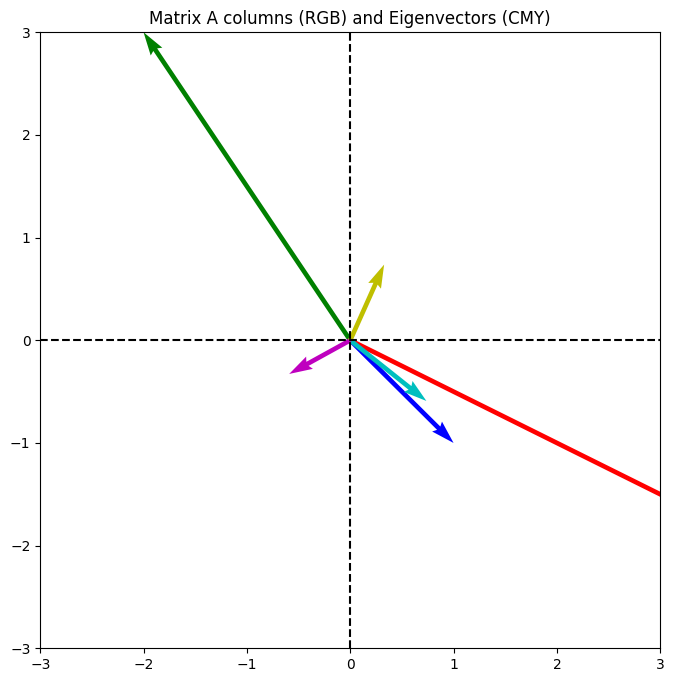

In [8]:
# Verify that Av = λv for each eigenpair
for i in range(3):
    print(f"\nVerification for eigenpair {i+1}:")
    print(f"A * v{i+1} =")
    print(np.dot(A, eigenvectors[:, i]))
    print(f"λ{i+1} * v{i+1} =")
    print(eigenvalues[i] * eigenvectors[:, i])

# Visualize eigenvectors (for 2D projection)
plt.figure(figsize=(8, 8))
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.quiver([0, 0, 0], [0, 0, 0], A[0, :], A[1, :], angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b'])
plt.quiver([0, 0, 0], [0, 0, 0], eigenvectors[0, :], eigenvectors[1, :], angles='xy', scale_units='xy', scale=1, color=['c', 'm', 'y'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("Matrix A columns (RGB) and Eigenvectors (CMY)")
plt.show()

In [9]:
# Determinant and Inverse of a 3x3 matrix

# Use the same matrix A from the previous example
print("Matrix A:")
print(A)

# Calculate determinant
det_A = np.linalg.det(A)
print(f"\nDeterminant of A: {det_A}")

# Calculate inverse if possible
if det_A != 0:
    inv_A = np.linalg.inv(A)
    print("\nInverse of A:")
    print(inv_A)
    
    # Verify that A * A^-1 = I
    print("\nVerification (A * A^-1):")
    print(np.dot(A, inv_A))
else:
    print("\nThe matrix is singular and does not have an inverse.")

Matrix A:
[[ 4 -2  1]
 [-2  3 -1]
 [ 1 -1  2]]

Determinant of A: 13.0

Inverse of A:
[[ 0.38461538  0.23076923 -0.07692308]
 [ 0.23076923  0.53846154  0.15384615]
 [-0.07692308  0.15384615  0.61538462]]

Verification (A * A^-1):
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  0.00000000e+00  1.00000000e+00]]


In [10]:
# Normal Distribution

# Generate a dataset
mu, sigma = 0, 1  # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

# Calculate probabilities
z_score = 1.96  # for 95% confidence interval
prob_within_1std = stats.norm.cdf(1) - stats.norm.cdf(-1)
prob_within_2std = stats.norm.cdf(2) - stats.norm.cdf(-2)
prob_within_ci = stats.norm.cdf(z_score) - stats.norm.cdf(-z_score)

print(f"Probability within 1 standard deviation: {prob_within_1std:.4f}")
print(f"Probability within 2 standard deviations: {prob_within_2std:.4f}")
print(f"Probability within 95% confidence interval: {prob_within_ci:.4f}")

Probability within 1 standard deviation: 0.6827
Probability within 2 standard deviations: 0.9545
Probability within 95% confidence interval: 0.9500


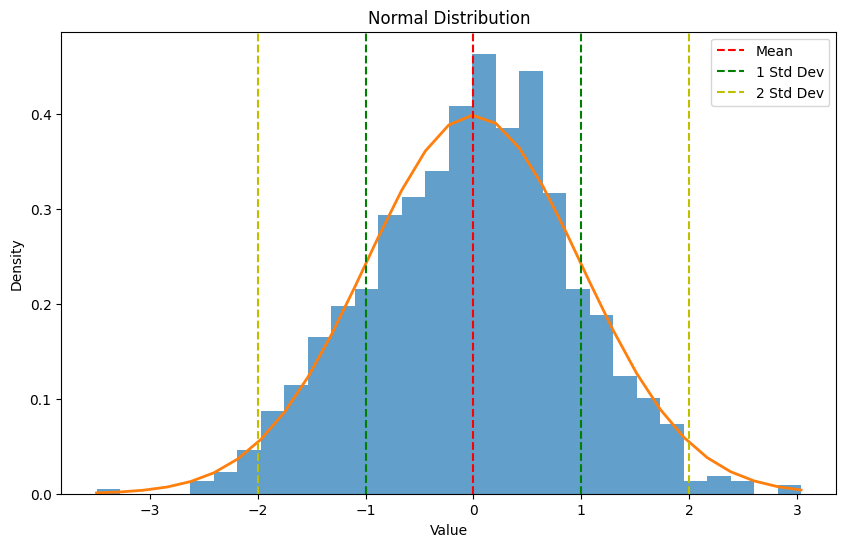

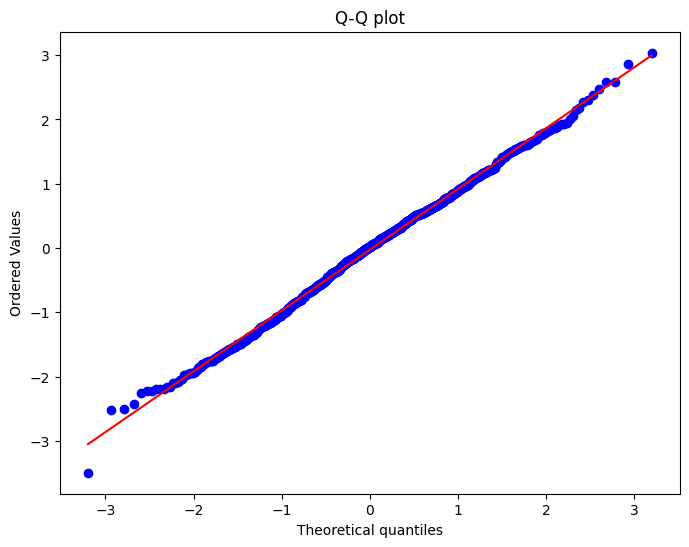

In [11]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, 30, density=True, alpha=0.7)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2)
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.axvline(x=mu, color='r', linestyle='--', label='Mean')
plt.axvline(x=mu+sigma, color='g', linestyle='--', label='1 Std Dev')
plt.axvline(x=mu-sigma, color='g', linestyle='--')
plt.axvline(x=mu+2*sigma, color='y', linestyle='--', label='2 Std Dev')
plt.axvline(x=mu-2*sigma, color='y', linestyle='--')
plt.legend()
plt.show()

# Q-Q plot to check normality
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=ax)
ax.set_title("Q-Q plot")
plt.show()